# Assignment - Simple Linear Regression

In [2]:
#importing all the libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression 

In [108]:
#import data set
ds = pd.read_csv("delivery_time.csv")
ds.tail(10)

,Delivery Time,Sorting Time
11,10.75,4
12,16.68,7
13,11.50,3
14,12.03,3
15,14.88,4
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


# EDA 

In [109]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [110]:
# Renaming the Column
ds=ds.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
ds

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [111]:
x = ds[["sorting_time"]]
y = ds[["delivery_time"]]

## Data Visulization

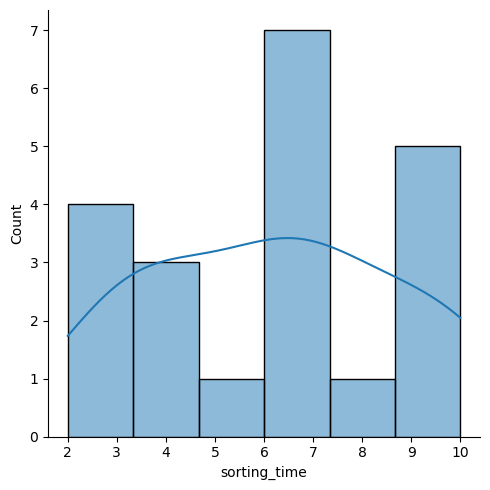

In [112]:
sns.displot(ds['sorting_time'], kde=True)

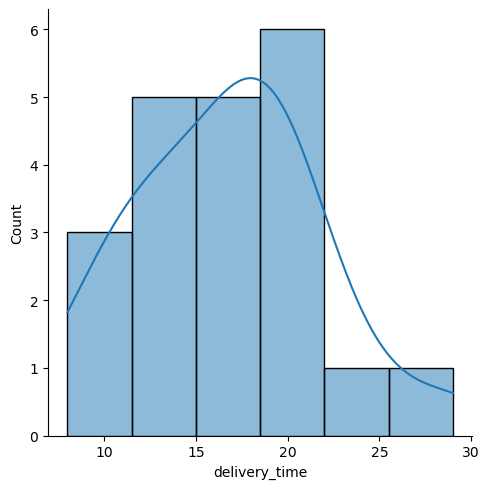

In [113]:
sns.displot(ds['delivery_time'], kde=True)

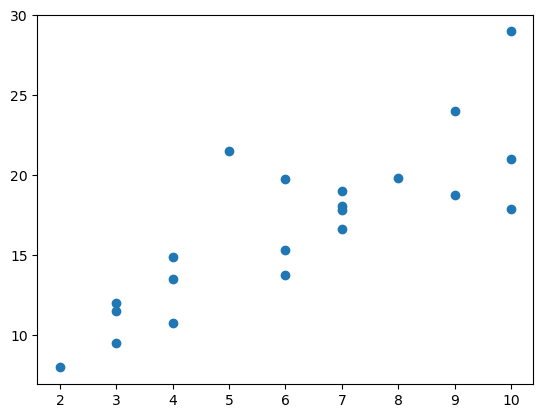

In [114]:
plt.scatter(x,y)

## Correlation Analysis

In [115]:
ds.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

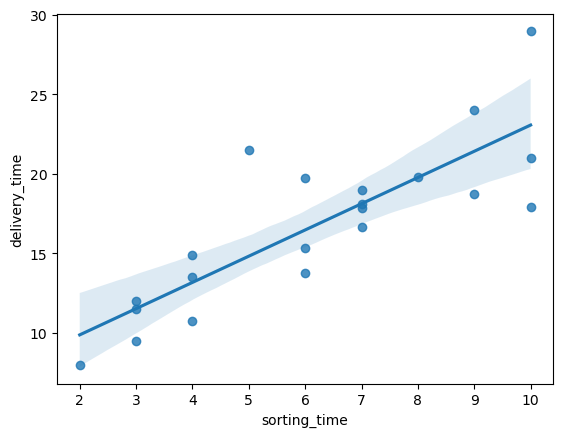

In [116]:
sns.regplot(x=ds['sorting_time'],y=ds['delivery_time'])

C:\Users\zarin khan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delivery_time'>

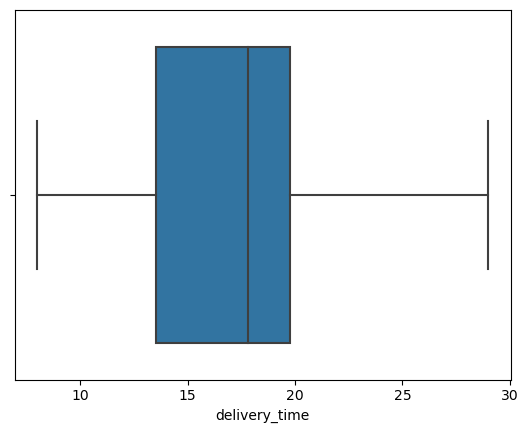

In [117]:
# checking for outliers
sns.boxplot(ds['delivery_time'])

## Linear Regression Model Building

In [118]:
model = LinearRegression()

## Model Fitting

In [119]:
model.fit(x, y)

LinearRegression()

## Model Prediction

In [120]:
x.dtypes


sorting_time    int64
dtype: object

In [121]:
# prediction 
model.predict(x)  ## just for exploratory purpose

array([[23.07293294],
       [13.17881356],
       [16.47685335],
       [21.42391304],
       [23.07293294],
       [16.47685335],
       [18.12587325],
       [11.52979366],
       [23.07293294],
       [21.42391304],
       [19.77489315],
       [13.17881356],
       [18.12587325],
       [11.52979366],
       [11.52979366],
       [13.17881356],
       [16.47685335],
       [18.12587325],
       [ 9.88077377],
       [18.12587325],
       [14.82783346]])

In [122]:
# checking the score of the model
model.score(x,y)

0.6822714748417231

In [123]:
# prediction for single value
model.predict([['4']])

C:\Users\zarin khan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\zarin khan\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


array([[13.17881356]])

## Giving a list to predict the Delivery time

In [124]:
sort_time=pd.DataFrame(['10','12'])
# sort_time=list['10','5']
sort_time

,0
0,10
1,12


In [125]:
# prediction for multiple values
model.predict(sort_time)

C:\Users\zarin khan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[23.07293294],
       [26.37097273]])